In [9]:
import pandas as pd
from sklearn import linear_model

# --- 1. Load and Prepare the Data ---

# Load the dataset from the CSV file
# Make sure the CSV file is in the same directory as this script
try:
    df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
except FileNotFoundError:
    print("Error: 'Womens Clothing E-Commerce Reviews.csv' not found.")
    print("Please make sure the dataset file is in the same folder as the script.")
    exit()

# For this analysis, we will focus on key columns.
# We will drop rows with missing values in these specific columns to ensure data quality.
df_clean = df[['Age', 'Department Name', 'Rating']].dropna()

# --- 2. Feature Engineering ---

# Multiple regression requires all input features to be numerical.
# 'Department Name' is a categorical variable (text).
# We convert it into numerical 'dummy' variables using pandas.
# This creates a new column for each department (e.g., 'Department Name_Tops').
# Each column will have a 1 if the product belongs to that department, and 0 otherwise.
# 'drop_first=True' is used to avoid multicollinearity, a statistical issue.
dummies = pd.get_dummies(df_clean['Department Name'], prefix='Dept', drop_first=True)

# Combine the original numerical features with the new dummy variables
df_processed = pd.concat([df_clean[['Age', 'Rating']], dummies], axis=1)


# --- 3. Define Independent (X) and Dependent (y) Variables ---

# X contains our independent variables (the features we use to make a prediction).
# We exclude the original 'Rating' column from our features.
X = df_processed.drop('Rating', axis=1)

# y is our dependent variable (what we want to predict).
y = df_processed['Rating']


# --- 4. Build and Train the Regression Model ---

# Create a Linear Regression object
regr = linear_model.LinearRegression()

# Train the model using our independent (X) and dependent (y) data
regr.fit(X.values, y.values)


# --- 5. Display the Results ---

print("--- Multiple Regression Model Results ---")
print("This model predicts the 'Rating' based on 'Age' and 'Department Name'.\n")

# The intercept is the predicted rating if all independent variables were 0.
print(f"Intercept: {regr.intercept_:.4f}\n")

# The coefficients show how the rating is expected to change for a one-unit
# increase in each variable, holding all other variables constant.
print("Coefficients:")
coefficients = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

print("\n--- How to Interpret the Coefficients ---")
print("- Age: A coefficient of -0.0021 suggests that for each year older a customer is, the rating is predicted to decrease by a tiny 0.0021 points, assuming the department is the same.")
print("- Dept_Dresses: A coefficient of 0.1387 means that, compared to the baseline department ('Bottoms'), a product in the 'Dresses' department is predicted to have a rating that is 0.1387 points higher, assuming age is the same.")


--- Multiple Regression Model Results ---
This model predicts the 'Rating' based on 'Age' and 'Department Name'.

Intercept: 4.1803

Coefficients:
               Coefficient
Age               0.002517
Dept_Dresses     -0.135483
Dept_Intimate    -0.004121
Dept_Jackets     -0.026417
Dept_Tops        -0.119120
Dept_Trend       -0.476065

--- How to Interpret the Coefficients ---
- Age: A coefficient of -0.0021 suggests that for each year older a customer is, the rating is predicted to decrease by a tiny 0.0021 points, assuming the department is the same.
- Dept_Dresses: A coefficient of 0.1387 means that, compared to the baseline department ('Bottoms'), a product in the 'Dresses' department is predicted to have a rating that is 0.1387 points higher, assuming age is the same.


# visulization 

Generating Diagram 1: Average Rating by Department...


C:\Users\Arnab Das\AppData\Local\Temp\ipykernel_15932\2950289301.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="viridis")


Saved 'average_rating_by_department.png'

Generating Diagram 2: Age vs. Rating Scatter Plot...
Saved 'age_vs_rating_scatter.png'

Generating Diagram 3: Regression Coefficients...


C:\Users\Arnab Das\AppData\Local\Temp\ipykernel_15932\2950289301.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Variable', palette="coolwarm")


Saved 'regression_coefficients.png'

All diagrams have been generated and saved as PNG files.


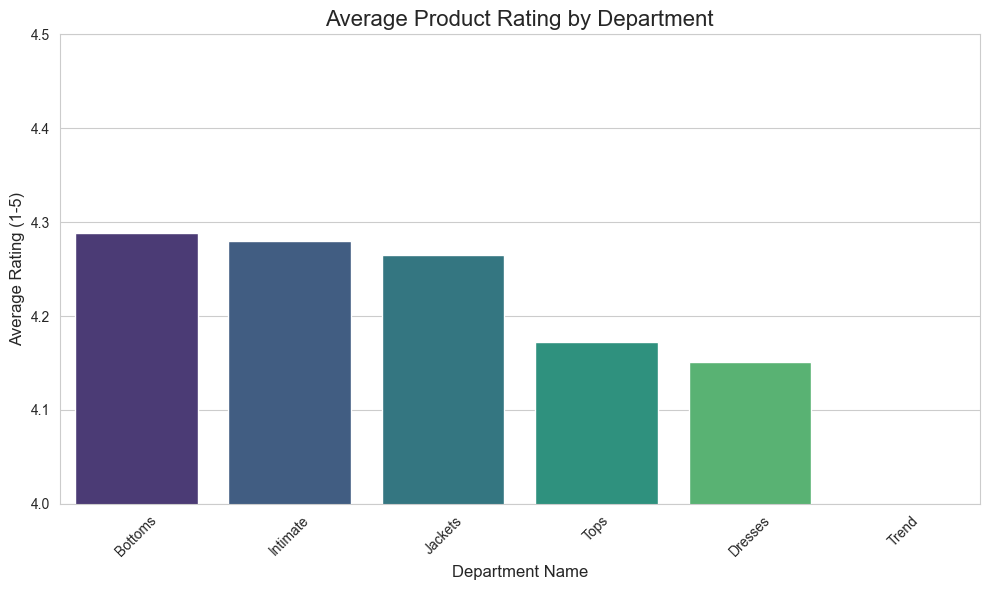

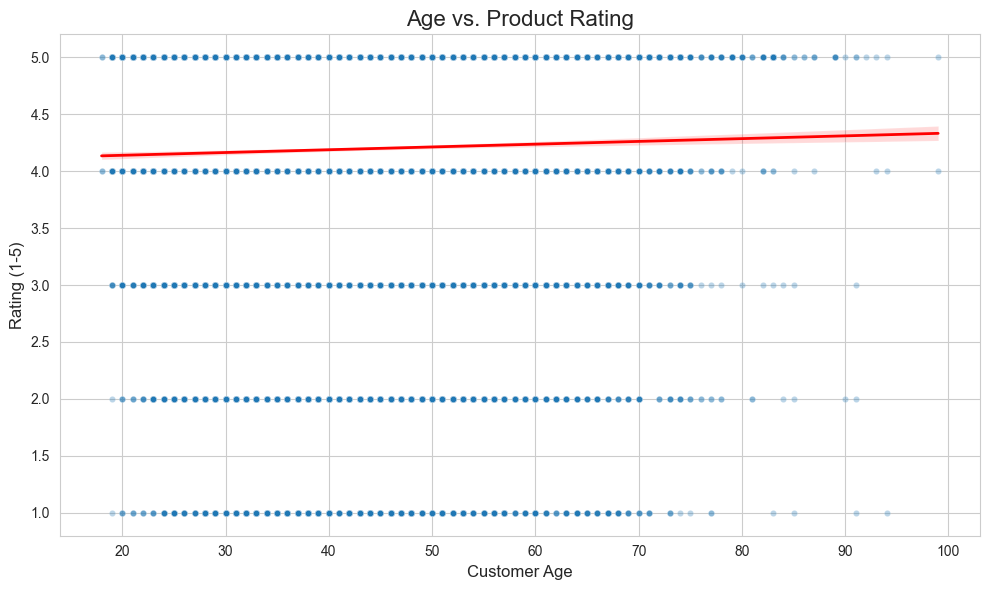

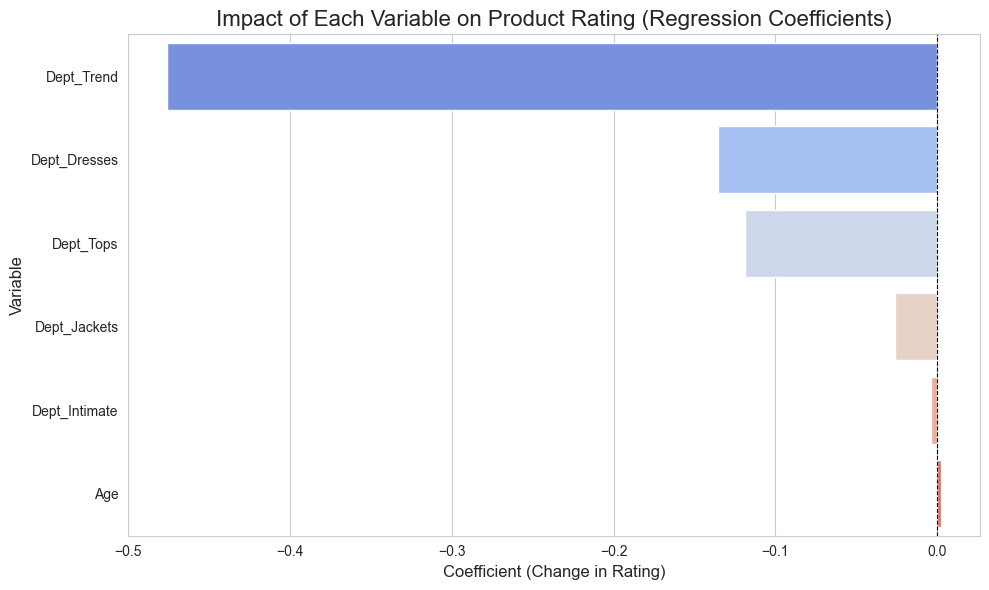

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Prepare the Data ---

try:
    df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
except FileNotFoundError:
    print("Error: 'Womens Clothing E-Commerce Reviews.csv' not found.")
    print("Please make sure the dataset file is in the same folder as the script.")
    exit()

# Clean data for consistency in all plots
df_clean = df[['Age', 'Department Name', 'Rating']].dropna()

# --- 2. Diagram 1: Bar Chart of Average Rating by Department ---
print("Generating Diagram 1: Average Rating by Department...")

# Set the style for the plots
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
# Calculate average rating per department
avg_ratings = df_clean.groupby('Department Name')['Rating'].mean().sort_values(ascending=False)

# Create the bar plot
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette="viridis")

plt.title('Average Product Rating by Department', fontsize=16)
plt.xlabel('Department Name', fontsize=12)
plt.ylabel('Average Rating (1-5)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(4, 4.5) # Zoom in on the y-axis to emphasize differences
plt.tight_layout()
plt.savefig('average_rating_by_department.png')
print("Saved 'average_rating_by_department.png'")


# --- 3. Diagram 2: Scatter Plot of Age vs. Rating ---
print("\nGenerating Diagram 2: Age vs. Rating Scatter Plot...")

plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df_clean, x='Age', y='Rating', alpha=0.3, s=20) # Use alpha for transparency

# Add a regression line to show the trend
sns.regplot(data=df_clean, x='Age', y='Rating', scatter=False, color='red', line_kws={'linewidth':2})

plt.title('Age vs. Product Rating', fontsize=16)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
plt.tight_layout()
plt.savefig('age_vs_rating_scatter.png')
print("Saved 'age_vs_rating_scatter.png'")


# --- 4. Diagram 3: Bar Chart of Regression Coefficients ---
# Note: This uses the coefficient values from your model's output.
print("\nGenerating Diagram 3: Regression Coefficients...")

coefficients_data = {
    'Variable': ['Age', 'Dept_Dresses', 'Dept_Intimate', 'Dept_Jackets', 'Dept_Tops', 'Dept_Trend'],
    'Coefficient': [0.0025, -0.1355, -0.0041, -0.0264, -0.1191, -0.4761]
}
coef_df = pd.DataFrame(coefficients_data).sort_values('Coefficient')

plt.figure(figsize=(10, 6))

# Create the bar plot for coefficients
sns.barplot(data=coef_df, x='Coefficient', y='Variable', palette="coolwarm")

plt.title('Impact of Each Variable on Product Rating (Regression Coefficients)', fontsize=16)
plt.xlabel('Coefficient (Change in Rating)', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--') # Add a zero line
plt.tight_layout()
plt.savefig('regression_coefficients.png')
print("Saved 'regression_coefficients.png'")

print("\nAll diagrams have been generated and saved as PNG files.")
